In [2]:
from pyinterpx.Interpolation import *

The interpolation took 0.15858 seconds


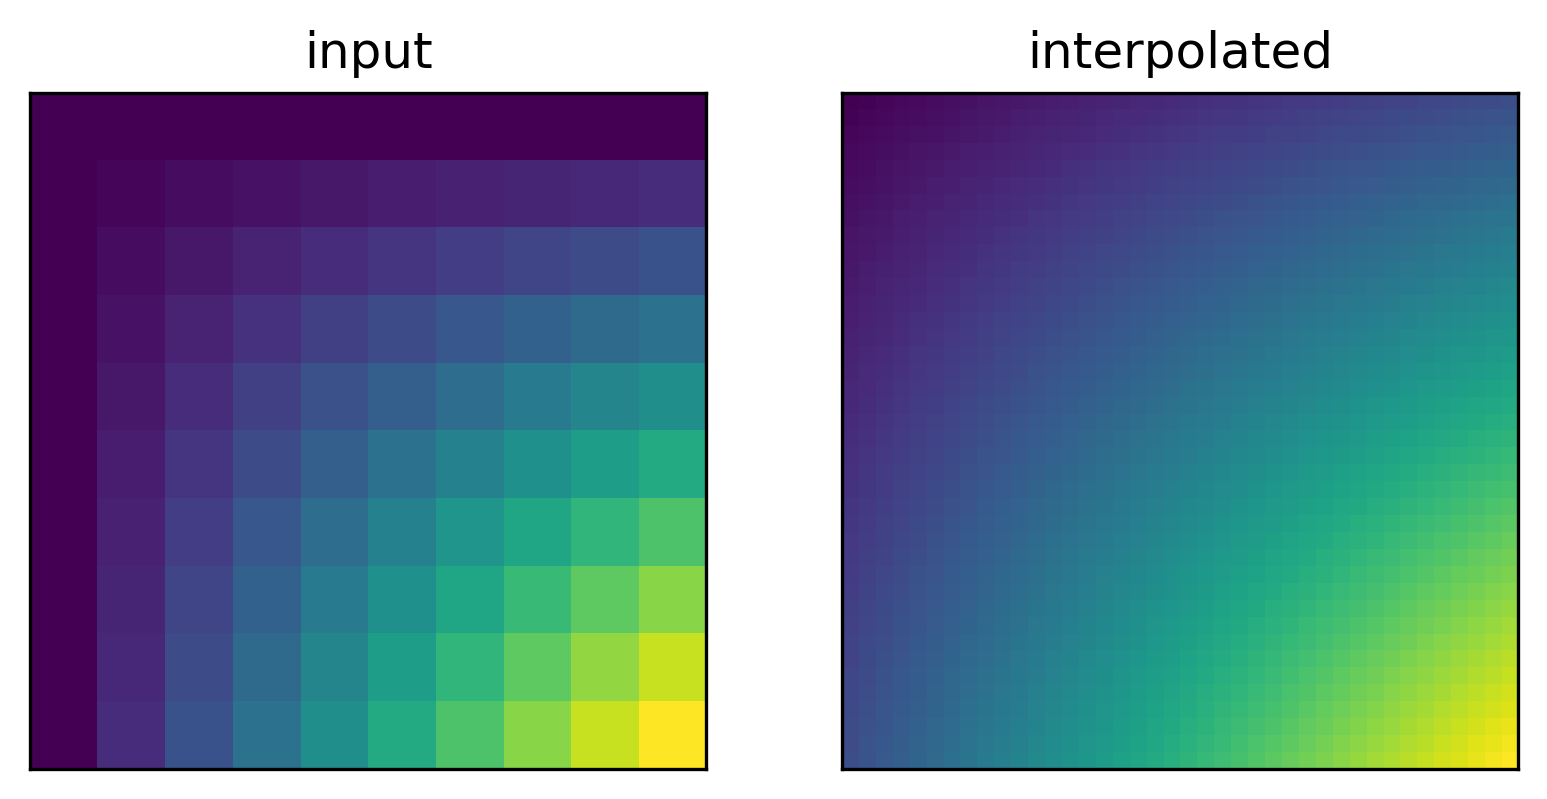

In [23]:
# Parameters for the interpolation
centering = True
factor = 8
channels = 25

# Setting up Interpolation class
interpolation = interp(
    num_points=6,
    max_degree=3,
    num_channels=channels,
    learnable=False,
    factor=factor,
    align_corners=centering,
)

# Creating inputdata using sinusoid
length = 10

# Initializing a tensor of random values to represent the grid
x = torch.zeros(2, channels, length, length, length)

# Preparing input positions for the sinusoidal function
input_positions = torch.zeros(length, length, length, 3)
for i in range(x.shape[2]):
    for j in range(x.shape[3]):
        for k in range(x.shape[4]):
            input_positions[i, j, k] = torch.tensor([i, j, k])
            pos = dx * np.array([i, j, k])
            x[:, :, i, j, k] = sinusoidal_function(*pos)

# Interpolating data
time1 = time.time()
interpolated = interpolation(x)
print(f"The interpolation took {(time.time() - time1):.5f} seconds")


# Plotting
plt.figure(dpi=300)
plt.subplot(121)
plt.title("input")
x_shape = x.shape
plt.xticks([])
plt.yticks([])
plt.imshow(x[0, 0, x_shape[2] // 2, :, :])

plt.subplot(122)
plt.title("interpolated")
interp_shape = interpolated.shape
plt.xticks([])
plt.yticks([])
plt.imshow(interpolated[0, 0, interp_shape[2] // 2, :, :])
plt.show()